# 男生藏多少私房钱女生可以容忍！
## Vcamp团队任务
### 组员：刘刚，李宜烜，聂海，张琮，程林，顾岩，陈文燕，李思琪（无顺序）

## 使用csv数据

In [4]:
!pip install xlrd

     |████████████████████████████████| 112kB 203kB/s eta 0:00:01


In [214]:
# 筛选数据
import pandas as pd
import random
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
#data = pd.read_excel('data_7-16.xls')#.drop(["性别",'序号','填表序号'],axis = 1)
data = pd.read_csv('woman717_1.csv',encoding='GB18030')#.drop(["性别",'序号','填表序号'],axis = 1)
data['结果'] = data['结果']-1
print(data.head(16))
print(int(data['id'].max()))
valid_data = []
for i in range(int(data['id'].max())):
    if data[data['id']==i]['结果'].max()==data[data['id']==i]['结果'].min():
        valid_data.append(i)
data = data[~data['id'].isin(valid_data)]
data = data.drop(['id'],axis = 1)
print(data.shape)

    id  外貌  星座  状态  性格  消费观念  是否接收私房钱  收入  男生收入  男生消费情况  男生颜值  结果
0    1   2   2   3   3     2        2   3     1       1     1   4
1    1   2   2   3   3     2        2   3     1       1     2   3
2    1   2   2   3   3     2        2   3     1       2     1   1
3    1   2   2   3   3     2        2   3     1       2     2   1
4    1   2   2   3   3     2        2   3     2       1     1   3
5    1   2   2   3   3     2        2   3     2       1     2   2
6    1   2   2   3   3     2        2   3     2       2     1   1
7    1   2   2   3   3     2        2   3     2       2     2   0
8    3   2   4   2   1     1        2   3     1       1     1   4
9    3   2   4   2   1     1        2   3     1       1     2   4
10   3   2   4   2   1     1        2   3     1       2     1   0
11   3   2   4   2   1     1        2   3     1       2     2   0
12   3   2   4   2   1     1        2   3     2       1     1   2
13   3   2   4   2   1     1        2   3     2       1     2   2
14   3   2

In [195]:

data.rename(columns={'外貌':'w_face','星座':'w_star','状态':'w_wedding','性格':'w_character',
                   '消费观念':'w_buy','是否接收私房钱':'w_is_pri-money','收入':'w_salary','男生收入':'m_salary',
                    '男生消费情况':'m_buy','男生颜值':'m_face','结果':'pri-money'}, inplace = True)
# data['pri-money'][data['pri-money']<1.5]=0
# data['pri-money'][(data['pri-money']>1.5) & (data['pri-money']<2.5)]=1
# data['pri-money'][(data['pri-money']>2.5) & (data['pri-money']<3.5)]=2
# data['pri-money'][data['pri-money']>3.5]=3
print(data.head())
print(data.shape)

   w_face  w_star  w_wedding  w_character  w_buy  w_is_pri-money  w_salary  \
0       2       2          3            3      2               2         3   
1       2       2          3            3      2               2         3   
2       2       2          3            3      2               2         3   
3       2       2          3            3      2               2         3   
4       2       2          3            3      2               2         3   

   m_salary  m_buy  m_face  pri-money  
0         1      1       1          4  
1         1      1       2          3  
2         1      2       1          1  
3         1      2       2          1  
4         2      1       1          3  
(592, 11)


<BarContainer object of 5 artists>

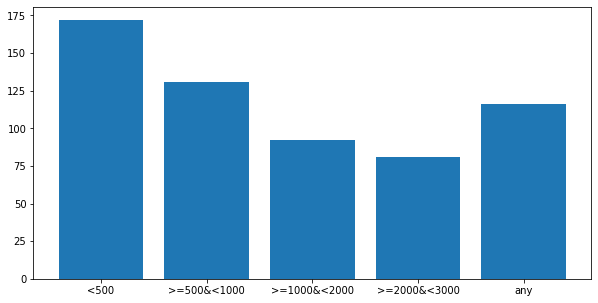

In [196]:
k = []
for i in range(5):
    k.append(data[data['pri-money']==i].shape[0])
plt.figure(figsize=(10,5))
xtic = ['<500','>=500&<1000','>=1000&<2000','>=2000&<3000','any']
plt.bar(xtic,k)

<BarContainer object of 10 artists>

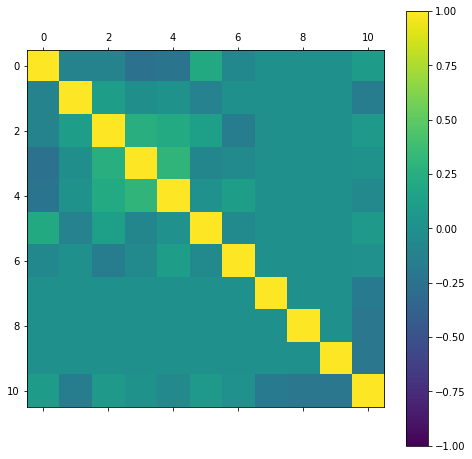

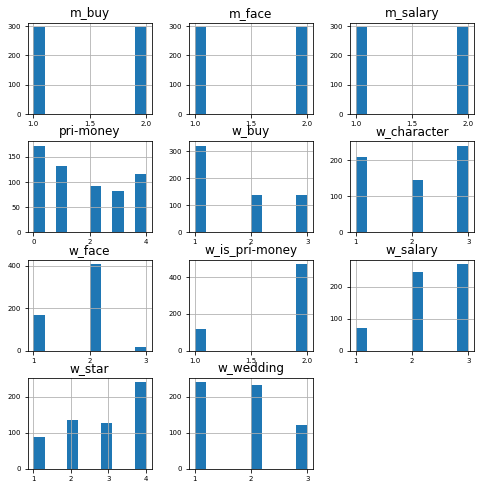

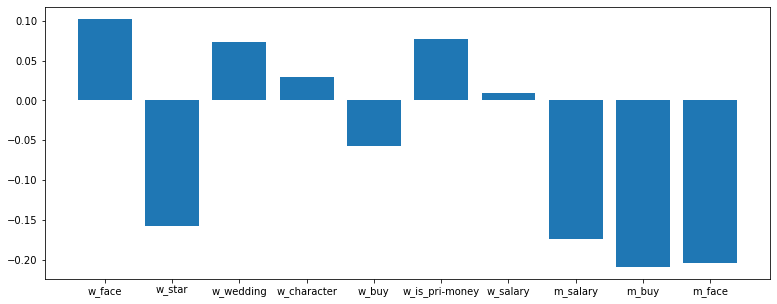

In [197]:
for i in range(10):
    pass
corr_data= data.corr()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_data,vmin=-1,vmax=1)
fig.colorbar(cax)

data.hist(xlabelsize=7,ylabelsize=7,figsize=(8,8.2))

corr_ = []
for t in data.columns[:-1]:
    corr_.append(data[t].corr(data['pri-money']))
plt.figure(figsize=(13,5))
#xtic = ['<500','>=500&<1000','>=1000&<2000','>=2000&<3000','any']
plt.bar(data.columns[:-1],corr_)

### 生成训练集，其中test传入待测试的特征，即交互界面上输入的特征

In [198]:
import math
df = data.sample(frac=1).reset_index(drop=True) #打乱样本
#df = data
train_num = 450
valid_num = 550

train_all = df.drop(['pri-money'],axis = 1)
train_all_y = df['pri-money']
print(train_all.head())

train = df[0:train_num]
tmp = df[valid_num:]  #test
tmp2 = df[train_num:valid_num] #valid
test_y = tmp['pri-money'].values
valid_y = tmp2['pri-money'].values
valid = np.array(tmp2.drop(['pri-money'],axis = 1))
test = np.array(tmp.drop(['pri-money'],axis = 1))
train_y = train['pri-money']
# test_y = test['pri-money']
train = train.drop(['pri-money'],axis = 1)
#train = round(train+0.5)
print(train.shape,'\n',test)
print(valid_y)
train.head()

   w_face  w_star  w_wedding  w_character  w_buy  w_is_pri-money  w_salary  \
0       2       4          3            2      3               2         3   
1       1       4          2            1      3               1         3   
2       1       3          3            3      1               2         1   
3       1       2          2            2      3               2         3   
4       2       3          2            2      3               2         2   

   m_salary  m_buy  m_face  
0         2      1       1  
1         1      2       1  
2         1      2       1  
3         1      1       1  
4         1      2       1  
(450, 10) 
 [[2 4 3 2 1 2 3 1 2 1]
 [2 3 2 1 1 2 2 1 1 2]
 [2 4 2 3 1 2 2 2 2 2]
 [1 3 2 2 2 1 2 2 1 1]
 [2 1 1 1 2 2 1 1 2 1]
 [1 4 3 3 2 1 3 2 2 1]
 [1 4 1 1 1 2 3 1 2 1]
 [2 2 1 1 1 1 2 2 2 2]
 [1 1 2 3 3 2 3 1 1 1]
 [2 4 2 1 1 2 2 2 1 1]
 [2 1 1 3 1 2 3 2 2 2]
 [2 3 2 2 3 2 2 1 1 1]
 [2 4 2 1 1 2 3 2 1 2]
 [2 4 1 1 1 2 2 1 2 1]
 [2 1 1 1 1 2 3 2 1 2]


,w_face,w_star,w_wedding,w_character,w_buy,w_is_pri-money,w_salary,m_salary,m_buy,m_face
0,2,4,3,2,3,2,3,2,1,1
1,1,4,2,1,3,1,3,1,2,1
2,1,3,3,3,1,2,1,1,2,1
3,1,2,2,2,3,2,3,1,1,1
4,2,3,2,2,3,2,2,1,2,1


In [171]:
# train = df[0:200]
# test = df[200:df.shape[0]]
# train = df
# train_y = train['pri-money']
# # test_y = test['pri-money']
# train = train.drop(['pri-money'],axis = 1)
# test = test.drop(['pri-money'],axis = 1)
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
# print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (160, 10) 


In [179]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import numpy as np
import warnings
warnings.filterwarnings('ignore')


## 定义交叉验证函数

#### 分类lgb

473 119
[1]	valid_0's multi_logloss: 1.54374
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_logloss: 1.53847
[3]	valid_0's multi_logloss: 1.53377
[4]	valid_0's multi_logloss: 1.52928
[5]	valid_0's multi_logloss: 1.52428
[6]	valid_0's multi_logloss: 1.51995
[7]	valid_0's multi_logloss: 1.51537
[8]	valid_0's multi_logloss: 1.51147
[9]	valid_0's multi_logloss: 1.50747
[10]	valid_0's multi_logloss: 1.50308
[11]	valid_0's multi_logloss: 1.4989
[12]	valid_0's multi_logloss: 1.4948
[13]	valid_0's multi_logloss: 1.49088
[14]	valid_0's multi_logloss: 1.48735
[15]	valid_0's multi_logloss: 1.48353
[16]	valid_0's multi_logloss: 1.47963
[17]	valid_0's multi_logloss: 1.47626
[18]	valid_0's multi_logloss: 1.47321
[19]	valid_0's multi_logloss: 1.47007
[20]	valid_0's multi_logloss: 1.46703
[21]	valid_0's multi_logloss: 1.46439
[22]	valid_0's multi_logloss: 1.46102
[23]	valid_0's multi_logloss: 1.45863
[24]	valid_0's multi_logloss: 1.45599
[25]	valid_0's multi_logloss:

[245]	valid_0's multi_logloss: 1.34301
[246]	valid_0's multi_logloss: 1.34313
[247]	valid_0's multi_logloss: 1.34248
[248]	valid_0's multi_logloss: 1.34234
[249]	valid_0's multi_logloss: 1.34277
[250]	valid_0's multi_logloss: 1.34264
[251]	valid_0's multi_logloss: 1.34274
[252]	valid_0's multi_logloss: 1.34218
[253]	valid_0's multi_logloss: 1.34253
[254]	valid_0's multi_logloss: 1.34221
[255]	valid_0's multi_logloss: 1.34212
[256]	valid_0's multi_logloss: 1.34202
[257]	valid_0's multi_logloss: 1.34219
[258]	valid_0's multi_logloss: 1.34177
[259]	valid_0's multi_logloss: 1.34161
[260]	valid_0's multi_logloss: 1.34164
[261]	valid_0's multi_logloss: 1.34133
[262]	valid_0's multi_logloss: 1.34136
[263]	valid_0's multi_logloss: 1.34135
[264]	valid_0's multi_logloss: 1.34154
[265]	valid_0's multi_logloss: 1.34137
[266]	valid_0's multi_logloss: 1.34091
[267]	valid_0's multi_logloss: 1.34083
[268]	valid_0's multi_logloss: 1.34061
[269]	valid_0's multi_logloss: 1.34019
[270]	valid_0's multi_log

[549]	valid_0's multi_logloss: 1.32293
[550]	valid_0's multi_logloss: 1.32311
[551]	valid_0's multi_logloss: 1.32279
[552]	valid_0's multi_logloss: 1.32243
[553]	valid_0's multi_logloss: 1.32223
[554]	valid_0's multi_logloss: 1.32254
[555]	valid_0's multi_logloss: 1.32239
[556]	valid_0's multi_logloss: 1.32241
[557]	valid_0's multi_logloss: 1.32207
[558]	valid_0's multi_logloss: 1.32199
[559]	valid_0's multi_logloss: 1.32193
[560]	valid_0's multi_logloss: 1.32177
[561]	valid_0's multi_logloss: 1.32159
[562]	valid_0's multi_logloss: 1.32148
[563]	valid_0's multi_logloss: 1.32157
[564]	valid_0's multi_logloss: 1.32153
[565]	valid_0's multi_logloss: 1.32152
[566]	valid_0's multi_logloss: 1.32102
[567]	valid_0's multi_logloss: 1.32095
[568]	valid_0's multi_logloss: 1.3213
[569]	valid_0's multi_logloss: 1.3215
[570]	valid_0's multi_logloss: 1.32124
[571]	valid_0's multi_logloss: 1.32142
[572]	valid_0's multi_logloss: 1.32144
[573]	valid_0's multi_logloss: 1.32136
[574]	valid_0's multi_loglo

473 119
[1]	valid_0's multi_logloss: 1.5704
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_logloss: 1.56675
[3]	valid_0's multi_logloss: 1.5632
[4]	valid_0's multi_logloss: 1.56077
[5]	valid_0's multi_logloss: 1.5577
[6]	valid_0's multi_logloss: 1.55596
[7]	valid_0's multi_logloss: 1.55326
[8]	valid_0's multi_logloss: 1.55181
[9]	valid_0's multi_logloss: 1.55008
[10]	valid_0's multi_logloss: 1.54729
[11]	valid_0's multi_logloss: 1.54569
[12]	valid_0's multi_logloss: 1.5434
[13]	valid_0's multi_logloss: 1.54208
[14]	valid_0's multi_logloss: 1.54048
[15]	valid_0's multi_logloss: 1.53887
[16]	valid_0's multi_logloss: 1.53749
[17]	valid_0's multi_logloss: 1.53565
[18]	valid_0's multi_logloss: 1.53416
[19]	valid_0's multi_logloss: 1.5324
[20]	valid_0's multi_logloss: 1.53078
[21]	valid_0's multi_logloss: 1.5288
[22]	valid_0's multi_logloss: 1.52759
[23]	valid_0's multi_logloss: 1.52613
[24]	valid_0's multi_logloss: 1.52528
[25]	valid_0's multi_logloss: 1.5

[315]	valid_0's multi_logloss: 1.46726
[316]	valid_0's multi_logloss: 1.46687
[317]	valid_0's multi_logloss: 1.46655
[318]	valid_0's multi_logloss: 1.46668
[319]	valid_0's multi_logloss: 1.46672
[320]	valid_0's multi_logloss: 1.46689
[321]	valid_0's multi_logloss: 1.46667
[322]	valid_0's multi_logloss: 1.46662
[323]	valid_0's multi_logloss: 1.46677
[324]	valid_0's multi_logloss: 1.46643
[325]	valid_0's multi_logloss: 1.4665
[326]	valid_0's multi_logloss: 1.46619
[327]	valid_0's multi_logloss: 1.46587
[328]	valid_0's multi_logloss: 1.46571
[329]	valid_0's multi_logloss: 1.46543
[330]	valid_0's multi_logloss: 1.46556
[331]	valid_0's multi_logloss: 1.46503
[332]	valid_0's multi_logloss: 1.46525
[333]	valid_0's multi_logloss: 1.46532
[334]	valid_0's multi_logloss: 1.46527
[335]	valid_0's multi_logloss: 1.46519
[336]	valid_0's multi_logloss: 1.46513
[337]	valid_0's multi_logloss: 1.46505
[338]	valid_0's multi_logloss: 1.46479
[339]	valid_0's multi_logloss: 1.46497
[340]	valid_0's multi_logl

[145]	valid_0's multi_logloss: 1.52384
[146]	valid_0's multi_logloss: 1.52401
[147]	valid_0's multi_logloss: 1.5241
[148]	valid_0's multi_logloss: 1.52411
[149]	valid_0's multi_logloss: 1.52366
Early stopping, best iteration is:
[99]	valid_0's multi_logloss: 1.52159
474 118
[1]	valid_0's multi_logloss: 1.59397
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_logloss: 1.59143
[3]	valid_0's multi_logloss: 1.589
[4]	valid_0's multi_logloss: 1.5868
[5]	valid_0's multi_logloss: 1.5844
[6]	valid_0's multi_logloss: 1.5825
[7]	valid_0's multi_logloss: 1.58051
[8]	valid_0's multi_logloss: 1.57819
[9]	valid_0's multi_logloss: 1.57669
[10]	valid_0's multi_logloss: 1.57489
[11]	valid_0's multi_logloss: 1.57282
[12]	valid_0's multi_logloss: 1.57075
[13]	valid_0's multi_logloss: 1.56902
[14]	valid_0's multi_logloss: 1.56651
[15]	valid_0's multi_logloss: 1.56459
[16]	valid_0's multi_logloss: 1.56229
[17]	valid_0's multi_logloss: 1.56054
[18]	valid_0's multi_logloss: 1

[243]	valid_0's multi_logloss: 1.47156
[244]	valid_0's multi_logloss: 1.47152
[245]	valid_0's multi_logloss: 1.47163
[246]	valid_0's multi_logloss: 1.47142
[247]	valid_0's multi_logloss: 1.47135
[248]	valid_0's multi_logloss: 1.47095
[249]	valid_0's multi_logloss: 1.4712
[250]	valid_0's multi_logloss: 1.4713
[251]	valid_0's multi_logloss: 1.47123
[252]	valid_0's multi_logloss: 1.47089
[253]	valid_0's multi_logloss: 1.47082
[254]	valid_0's multi_logloss: 1.47062
[255]	valid_0's multi_logloss: 1.47038
[256]	valid_0's multi_logloss: 1.47005
[257]	valid_0's multi_logloss: 1.47017
[258]	valid_0's multi_logloss: 1.47015
[259]	valid_0's multi_logloss: 1.46988
[260]	valid_0's multi_logloss: 1.46967
[261]	valid_0's multi_logloss: 1.4695
[262]	valid_0's multi_logloss: 1.46966
[263]	valid_0's multi_logloss: 1.46986
[264]	valid_0's multi_logloss: 1.46929
[265]	valid_0's multi_logloss: 1.4694
[266]	valid_0's multi_logloss: 1.46933
[267]	valid_0's multi_logloss: 1.46917
[268]	valid_0's multi_logloss

[479]	valid_0's multi_logloss: 1.44839
[480]	valid_0's multi_logloss: 1.44815
[481]	valid_0's multi_logloss: 1.44803
[482]	valid_0's multi_logloss: 1.44783
[483]	valid_0's multi_logloss: 1.44799
[484]	valid_0's multi_logloss: 1.44758
[485]	valid_0's multi_logloss: 1.44798
[486]	valid_0's multi_logloss: 1.44772
[487]	valid_0's multi_logloss: 1.44783
[488]	valid_0's multi_logloss: 1.44786
[489]	valid_0's multi_logloss: 1.4478
Early stopping, best iteration is:
[439]	valid_0's multi_logloss: 1.44677
474 118
[1]	valid_0's multi_logloss: 1.57915
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_logloss: 1.57455
[3]	valid_0's multi_logloss: 1.57018
[4]	valid_0's multi_logloss: 1.56584
[5]	valid_0's multi_logloss: 1.56172
[6]	valid_0's multi_logloss: 1.55806
[7]	valid_0's multi_logloss: 1.55481
[8]	valid_0's multi_logloss: 1.55125
[9]	valid_0's multi_logloss: 1.54814
[10]	valid_0's multi_logloss: 1.5446
[11]	valid_0's multi_logloss: 1.54178
[12]	valid_0's multi

[359]	valid_0's multi_logloss: 1.40806
[360]	valid_0's multi_logloss: 1.40768
[361]	valid_0's multi_logloss: 1.40788
[362]	valid_0's multi_logloss: 1.40795
[363]	valid_0's multi_logloss: 1.40784
[364]	valid_0's multi_logloss: 1.40791
[365]	valid_0's multi_logloss: 1.40771
[366]	valid_0's multi_logloss: 1.40764
[367]	valid_0's multi_logloss: 1.40757
[368]	valid_0's multi_logloss: 1.40749
[369]	valid_0's multi_logloss: 1.40757
[370]	valid_0's multi_logloss: 1.40771
[371]	valid_0's multi_logloss: 1.40808
[372]	valid_0's multi_logloss: 1.40796
[373]	valid_0's multi_logloss: 1.40753
[374]	valid_0's multi_logloss: 1.40761
[375]	valid_0's multi_logloss: 1.40762
[376]	valid_0's multi_logloss: 1.40784
[377]	valid_0's multi_logloss: 1.4075
[378]	valid_0's multi_logloss: 1.40743
[379]	valid_0's multi_logloss: 1.40704
[380]	valid_0's multi_logloss: 1.40721
[381]	valid_0's multi_logloss: 1.40729
[382]	valid_0's multi_logloss: 1.40746
[383]	valid_0's multi_logloss: 1.40734
[384]	valid_0's multi_logl

[0.48739495798319327, 0.3949579831932773, 0.3135593220338983, 0.4152542372881356, 0.3644067796610169]


<Figure size 864x432 with 0 Axes>

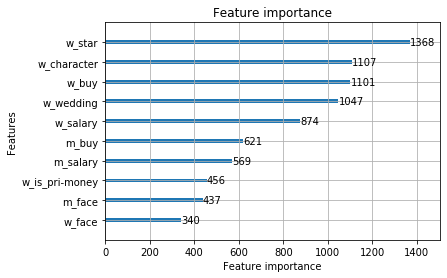

In [206]:

from sklearn.model_selection import KFold
kfold_res = []
kf = KFold(n_splits=5)
for train_index, valid_index in kf.split(train_all):
    print(len(train_index),len(valid_index))
    train_data=lgb.Dataset(train_all.iloc[train_index],label=train_all_y.iloc[train_index])
    validation_data=lgb.Dataset(train_all.iloc[valid_index],label=train_all_y.iloc[valid_index])
    params={
        'learning_rate':0.04,
        'lambda_l1':0.1,
        'lambda_l2':0.9,
        'max_depth':2,
        'objective':'multiclass',
        "num_boost_round":2000,
        "early_stopping_round":50,
        "verbose_eval":50,
        'num_class':5,  #lightgbm.basic.LightGBMError: b‘Number of classes should be specified and greater than 1 for multiclass training‘
    }
    clf=lgb.train(params,train_data,valid_sets=[validation_data])
    from sklearn.metrics import roc_auc_score,accuracy_score
    y_pred=clf.predict(train_all.iloc[valid_index].values)
    y_pred=[list(x).index(max(x)) for x in y_pred]
    #print(list(y_pred),'\n\n',list(valid_y))
    kfold_res.append(accuracy_score(train_all_y.iloc[valid_index].values,y_pred))
print(kfold_res)
plt.figure(figsize=(12,6))
lgb.plot_importance(clf,max_num_features=10)

  ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


[1]	valid_0's multi_logloss: 1.57644
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_logloss: 1.57466
[3]	valid_0's multi_logloss: 1.57293
[4]	valid_0's multi_logloss: 1.57087
[5]	valid_0's multi_logloss: 1.56861
[6]	valid_0's multi_logloss: 1.56675
[7]	valid_0's multi_logloss: 1.56435
[8]	valid_0's multi_logloss: 1.56211
[9]	valid_0's multi_logloss: 1.56019
[10]	valid_0's multi_logloss: 1.55846
[11]	valid_0's multi_logloss: 1.5562
[12]	valid_0's multi_logloss: 1.55447
[13]	valid_0's multi_logloss: 1.5523
[14]	valid_0's multi_logloss: 1.54964
[15]	valid_0's multi_logloss: 1.5477
[16]	valid_0's multi_logloss: 1.54643
[17]	valid_0's multi_logloss: 1.54445
[18]	valid_0's multi_logloss: 1.54204
[19]	valid_0's multi_logloss: 1.54021
[20]	valid_0's multi_logloss: 1.53814
[21]	valid_0's multi_logloss: 1.53657
[22]	valid_0's multi_logloss: 1.5346
[23]	valid_0's multi_logloss: 1.53308
[24]	valid_0's multi_logloss: 1.53175
[25]	valid_0's multi_logloss: 1.53046
[

[261]	valid_0's multi_logloss: 1.42844
[262]	valid_0's multi_logloss: 1.42867
[263]	valid_0's multi_logloss: 1.42852
[264]	valid_0's multi_logloss: 1.42849
[265]	valid_0's multi_logloss: 1.42832
[266]	valid_0's multi_logloss: 1.42832
[267]	valid_0's multi_logloss: 1.42754
[268]	valid_0's multi_logloss: 1.4277
[269]	valid_0's multi_logloss: 1.42776
[270]	valid_0's multi_logloss: 1.42765
[271]	valid_0's multi_logloss: 1.42732
[272]	valid_0's multi_logloss: 1.42738
[273]	valid_0's multi_logloss: 1.42718
[274]	valid_0's multi_logloss: 1.42727
[275]	valid_0's multi_logloss: 1.4277
[276]	valid_0's multi_logloss: 1.42792
[277]	valid_0's multi_logloss: 1.42783
[278]	valid_0's multi_logloss: 1.42791
[279]	valid_0's multi_logloss: 1.42801
[280]	valid_0's multi_logloss: 1.42797
[281]	valid_0's multi_logloss: 1.42819
[282]	valid_0's multi_logloss: 1.42815
[283]	valid_0's multi_logloss: 1.42815
[284]	valid_0's multi_logloss: 1.42809
[285]	valid_0's multi_logloss: 1.42755
[286]	valid_0's multi_loglo

[537]	valid_0's multi_logloss: 1.41876
[538]	valid_0's multi_logloss: 1.41859
[539]	valid_0's multi_logloss: 1.41852
[540]	valid_0's multi_logloss: 1.4186
[541]	valid_0's multi_logloss: 1.41889
[542]	valid_0's multi_logloss: 1.41896
[543]	valid_0's multi_logloss: 1.41915
[544]	valid_0's multi_logloss: 1.41925
[545]	valid_0's multi_logloss: 1.41914
[546]	valid_0's multi_logloss: 1.41893
[547]	valid_0's multi_logloss: 1.41893
[548]	valid_0's multi_logloss: 1.41908
[549]	valid_0's multi_logloss: 1.41909
[550]	valid_0's multi_logloss: 1.41876
[551]	valid_0's multi_logloss: 1.41882
[552]	valid_0's multi_logloss: 1.41897
[553]	valid_0's multi_logloss: 1.41904
[554]	valid_0's multi_logloss: 1.41907
[555]	valid_0's multi_logloss: 1.4192
[556]	valid_0's multi_logloss: 1.41934
[557]	valid_0's multi_logloss: 1.41939
[558]	valid_0's multi_logloss: 1.41963
[559]	valid_0's multi_logloss: 1.41978
[560]	valid_0's multi_logloss: 1.41995
[561]	valid_0's multi_logloss: 1.42003
[562]	valid_0's multi_loglo

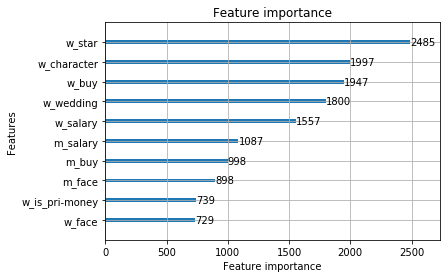

In [215]:
## 不交叉验证
import pickle
train_data=lgb.Dataset(train,label=train_y)
validation_data=lgb.Dataset(valid,label=valid_y)
params={
    'boosting_type':'gbdt',
    'learning_rate':0.03,
    'lambda_l1':0.01,
    'lambda_l2':10,
    'max_depth':3,
    'num_leaves':25,
    'feature_fraction':0.6,
    'bagging_fraction':1,
    'bagging_freq':0,
    'min_split_gain':0.01,
    'objective':'multiclass',
    "num_boost_round":2000,
    "early_stopping_round":50,
    "verbose_eval":50,
    'num_class':5,  
}
clf=lgb.train(params,train_data,valid_sets=[validation_data])
from sklearn.metrics import roc_auc_score,accuracy_score
y_pred=clf.predict(valid)
y_pred=[list(x).index(max(x)) for x in y_pred]
print(list(y_pred),'\n\n',list(valid_y))
print(accuracy_score(valid_y,y_pred))
lgb.plot_importance(clf)

# test model save
pickle.dump(clf,open('./mymodel2.pkl','wb'))


input_c = [1,1,1,1,1,1,1,1,1,1]
clf = pickle.load(open('./mymodel2.pkl','rb'))
px = clf.predict(([input_c]))
result = [list(x).index(max(x)) for x in px]
print(result[0])

In [339]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.3181 (0.0182)



In [340]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.3185 (0.0189)



In [341]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.3111 (0.0157)



In [342]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.3111 (0.0157)



## 模型融合Stacking test

In [370]:
base_models = (model_lgb, GBoost, ENet)
out_of_fold_predictions_test = np.zeros((test.shape[0], len(base_models)))
def stacking_fit(base_models, meta_model, X, y):
        base_models_ = [list() for x in base_models]
        meta_model_ = clone(meta_model)
        kfold = KFold(n_splits=5, shuffle=True, random_state=156)
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(base_models)))
        
        all_models_list = [[] for i in range(0,len(base_models))]
        for i, model in enumerate(base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                all_models_list[i].append(instance)
                y_pred = instance.predict(X[holdout_index])
                ## test_pred = instance.predict(test)
                out_of_fold_predictions[holdout_index, i] = y_pred
                ## out_of_fold_predictions_test[:, i] += test_pred
        return out_of_fold_predictions, all_models_list#out_of_fold_predictions_test/5
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        ##meta_model_.fit(out_of_fold_predictions, y)
        ##print(out_of_fold_predictions.shape)
out_of_fold_predictions, all_models_list = stacking_fit(base_models,
                             meta_model = lasso, X=train.values, y=train_y )
print(out_of_fold_predictions[0:5])

[[2.63520707 2.61662476 2.60549062]
 [2.65387132 2.62761558 2.62940182]
 [2.59306556 2.5842191  2.68748663]
 [2.62026492 2.60123315 2.64556676]
 [2.13401848 2.12228188 2.2653964 ]]


In [352]:
score = rmsle_cv_stacking(lasso, out_of_fold_predictions, train_y)
print("\nStacking score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Stacking score: 0.3189 (0.0103)



## Stacking predict
**np.round(lasso.predict(out_of_fold_predictions_test) 为界面输出值**

In [379]:
tmp_res_matrix = np.zeros((len(all_models_list), len(all_models_list[0]))) 
for i in range(len(all_models_list)):
    for j in range(len(all_models_list[0])):
        tmp_res_matrix[i][j] = all_models_list[i][j].predict(test)
out_of_fold_predictions_test = (np.array(tmp_res_matrix).sum(axis=1)/len(all_models_list[0]))[np.newaxis,:]
lasso.fit(out_of_fold_predictions, train_y)
print("test_predict:",np.round(lasso.predict(out_of_fold_predictions_test)))
## print('true_test_y:',test_y.values)

test_predict: [2.]


## 平均融合（测试用的，忽略）

In [306]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [307]:
averaged_models = AveragingModels(models = (model_lgb, GBoost, model_xgb))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.3245 (0.0184)

